In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

panda games
===

"tokens.csv" contains all datasets, with one row per word/token. tokens.csv has been created using all permutations of: 

    concept_type = ("parse", "ngrams")
    embedding_variants = ("google.neg.300d", "glove.6B.300d", "tudarmstadt_german")
    datasets = ("DUC2007","DUC2004","DUC2006","DBS")

    concept_type \times embedding_variants \times datasets. 
    
Therefore, every sentence has been processed `2 * 3 * 4 = 24` times. 

Load the preprocessed csv from casum, and then shit out a whole load of latex files after grouping.



In [2]:
# make export to latex easy
def export_to_latex(df, fn):
    mystr = df.to_latex(encoding="utf-8")
    with open('C:\\users\\hatieke\\.ukpsummarizer\\tmp\\%s.tex' % (fn), 'w') as file:
        file.write(mystr)

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

prepare the data
--

In [4]:
csv = pd.read_csv("C:\\Users\\hatieke\\.ukpsummarizer\\tmp\\tokens.csv", low_memory=False)

In [5]:
tdf=pd.DataFrame(csv)
#.drop_duplicates(subset=["word", "token", COL_CONCEPT_TYPE, COL_EMVAR])

In [6]:
#tdf = tdf.sample(19999)

In [7]:
COL_TOKEN_HAS_EMBEDDED_NUMBER="token_embedded_as_number"
COL_CONCEPT_TYPE = "concept_type2"
COL_WORD_EMBEDDED_AS_NUMBER = "word_embedded_as_number"
COL_EMVAR="embedding_variant"
COL_DS = "dataset"
GRP_DEFAULT= [COL_CONCEPT_TYPE, COL_EMVAR, COL_DS]

In [8]:
tdf.loc[:,COL_CONCEPT_TYPE] = tdf.apply(lambda x: ("phrase" if x.concept_type == "parse" else "ngram"), axis=1)
tdf.loc[:,COL_TOKEN_HAS_EMBEDDED_NUMBER] = tdf.apply(lambda x: 1.0 if x.token_has_embedding else None, axis=1)
tdf.loc[:,COL_WORD_EMBEDDED_AS_NUMBER] = tdf.apply(lambda x: 1.0 if x.word_has_embedding else None, axis=1)

In [9]:
# check that for each dataset has the same amount of tokens
tdf.loc[:,["Unnamed: 0", COL_CONCEPT_TYPE, COL_EMVAR]]\
    .groupby([COL_CONCEPT_TYPE, COL_EMVAR])\
    .count()
# as a result, all values in the column "Unnamed: 0" should be equal (within the concept-type)

Unnamed: 0
concept_type2 embedding_variant             
ngram         glove.6B.300d          2419860
              google.neg.300d        2419860
              tudarmstadt_german     2419860
phrase        glove.6B.300d           988864
              google.neg.300d         988864
              tudarmstadt_german      988864

Basic overview
===

How many unique tokens are there?

In [10]:
tdf.drop_duplicates(["token"]).shape
# now, it doesnt make sense anymore to look at the COL_EMVAR, as probably most of them have been deleted...


(42451, 18)

How many tokens are there per embedding?

In [11]:
t = tdf.drop_duplicates(["token", COL_EMVAR]).groupby(COL_EMVAR).count().loc[:,["token"]]
export_to_latex(t, "unique-tokens-per-embedding-variant")
t

,token
embedding_variant,
glove.6B.300d,42450
google.neg.300d,42450
tudarmstadt_german,42450


How many tokens have an embedding (depending on the embedding)?

In [12]:
t = tdf.drop_duplicates(["token", COL_EMVAR]).groupby([COL_EMVAR, "token_has_embedding"]).count().loc[:,["Unnamed: 0"]]
export_to_latex(t, "token-embeddings-per-embedding-variant--(phrase-and-ngram)")
t

Unnamed: 0
embedding_variant  token_has_embedding            
glove.6B.300d      False                     20341
                   True                      22110
google.neg.300d    False                     29920
                   True                      12531
tudarmstadt_german False                     25090
                   True                      17361

How many WORDS have an embedding?

In [13]:
t = tdf.drop_duplicates(["word", COL_EMVAR]).groupby([COL_EMVAR, "word_has_embedding"]).count().loc[:,["Unnamed: 0"]]
export_to_latex(t, "word-embeddings-per-embedding-variant--(phrase-and-ngram)")
t

Unnamed: 0
embedding_variant  word_has_embedding            
glove.6B.300d      False                    32595
                   True                     60177
google.neg.300d    False                    50852
                   True                     41920
tudarmstadt_german False                    48263
                   True                     44509

How many tokens are there, and how many of them have an embedding? 
How do does the concept_type interfer with embedding? 
And how perform the different embedding_variants against each other?

In [14]:
t = tdf.drop_duplicates([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "token"]).groupby([COL_DS,COL_EMVAR,COL_CONCEPT_TYPE]).count().loc[:,["token","token_embedded_as_number"],]
export_to_latex(t, "token-embeddings-per-dataset,embedding-variant,concept-type")
t

token  token_embedded_as_number
dataset embedding_variant  concept_type2                                 
DBS     glove.6B.300d      ngram           9651                      2221
                           phrase          8412                      1925
        google.neg.300d    ngram           9651                      1319
                           phrase          8412                      1157
        tudarmstadt_german ngram           9651                      4906
                           phrase          8412                      4379
DUC2004 glove.6B.300d      ngram          11594                      8008
                           phrase         11435                      7876
        google.neg.300d    ngram          11594                      5824
                           phrase         11435                      5751
        tudarmstadt_german ngram          11594                      5743
                           phrase         11435                      5696
DUC2006 glove.6B.300d      ngram          22793                     14404
                           phrase         22457                     14152
        google.neg.300d    ngram          22793                      9335
                           phrase         22457                      9291
        tudarmstadt_german ngram          22793                      9601
                           phrase         22457                      9602
DUC2007 glove.6B.300d      ngram          18676                     12348
                           phrase         18406                     12152
        google.neg.300d    ngram          18676                      8300
                           phrase         18406                      8263
        tudarmstadt_german ngram          18676                      8584
                           phrase         18406                      8586

How many words are there, and how many of them have an embedding? How do does the concept_type interfer with embedding? And how perform the different embedding_variants against each other?

In [15]:
t = tdf.drop_duplicates([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "word"]).groupby([COL_DS,COL_EMVAR,COL_CONCEPT_TYPE]).count().loc[:,["word", "word_embedded_as_number"]]
export_to_latex(t, "word-embeddings-per-dataset,embedding-variant,concept-type")
t

word  word_embedded_as_number
dataset embedding_variant  concept_type2                                
DBS     glove.6B.300d      ngram           9651                     2221
                           phrase         10952                     2189
        google.neg.300d    ngram           9651                     1319
                           phrase         10952                     1368
        tudarmstadt_german ngram           9651                     4906
                           phrase         10952                     7788
DUC2004 glove.6B.300d      ngram          11594                     8008
                           phrase         17802                    17024
        google.neg.300d    ngram          11594                     5824
                           phrase         17802                    14355
        tudarmstadt_german ngram          11594                     5743
                           phrase         17802                    10645
DUC2006 glove.6B.300d      ngram          22793                    14404
                           phrase         36328                    33227
        google.neg.300d    ngram          22793                     9335
                           phrase         36328                    26845
        tudarmstadt_german ngram          22793                     9601
                           phrase         36328                    19403
DUC2007 glove.6B.300d      ngram          18676                    12348
                           phrase         29482                    27509
        google.neg.300d    ngram          18676                     8300
                           phrase         29482                    22619
        tudarmstadt_german ngram          18676                     8584
                           phrase         29482                    17106

In [21]:
# number of unique tokens 
t = tdf.loc[:,["dataset",COL_TOKEN_HAS_EMBEDDED_NUMBER, COL_WORD_EMBEDDED_AS_NUMBER,COL_CONCEPT_TYPE,COL_EMVAR]]\
    .groupby([COL_CONCEPT_TYPE,COL_EMVAR, "dataset"])\
    .size()
export_to_latex(pd.DataFrame(t), "unique-tokens-without-embedding-lalalal")

Unknown vocab in glove when type is phrase
===

In [22]:
isGlove = tdf[COL_EMVAR].map(lambda x: x == "glove.6B.300d")
isPhrase = tdf[COL_CONCEPT_TYPE].map(lambda x: x == "phrase")

tsh=tdf.loc[isGlove & isPhrase,:]
#tsh = tsh.drop_duplicates(subset=["token"])

In [23]:
tsl = tsh

In [63]:
tsh.drop_duplicates(["word"])\
.groupby([COL_WORD_EMBEDDED_AS_NUMBER, "from_summary"])[COL_WORD_EMBEDDED_AS_NUMBER].count()


word_embedded_as_number  from_summary
1.00                     False           46872
                         True             1675
Name: word_embedded_as_number, dtype: int64

In [65]:
t = tsl.drop_duplicates("word").loc[tsl.word_has_embedding<0.5, ["word",COL_DS, "language"]]
t.to_csv("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\unknown-words-on-phrase-glove.csv", encoding="UTF-8")
#    mystr = df.to_latex(encoding="utf-8")
#    with open('C:\\users\\hatieke\\.ukpsummarizer\\tmp\\%s.tex' % (fn), 'w') as file:
#        file.write(mystr)

In [26]:
tsl[COL_TOKEN_HAS_EMBEDDED_NUMBER].count()

796283

In [27]:
tsl[COL_WORD_EMBEDDED_AS_NUMBER].count()

953588

unique words and tokens
===

In [107]:
phrases=tdf.drop_duplicates(["token", "word", "language", COL_EMVAR])

In [101]:
#phrases = phrases.loc[phrases.language == "german", :]

In [100]:
#isGlove = phrases[COL_EMVAR].map(lambda x: x == "glove.6B.300d")
#isPhrase = phrases[COL_CONCEPT_TYPE].map(lambda x: x == "phrase")
#isGerman = phrases.loc[phrases.language == "german", :]
#isGerman.head()

,Unnamed: 0,concept_type,dataset,doc_id,embedding_variant,from_document,from_summary,language,pos_tag,sentence_pos,token,token_has_embedding,topic,word,word_has_embedding,concept_type2,token_embedded_as_number,word_embedded_as_number
9699051,9699051,parse,DBS,0,google.neg.300d,True,False,german,NN,1,herr,True,10,Herr,True,phrase,1.00,1.00
9699052,9699052,parse,DBS,0,google.neg.300d,True,False,german,NE,1,weishaupt,False,10,Weishaupt,False,phrase,nan,nan
9699053,9699053,parse,DBS,0,google.neg.300d,True,False,german,NE,1,bay,True,10,Bayern,True,phrase,1.00,1.00
9699054,9699054,parse,DBS,0,google.neg.300d,True,False,german,VMFIN,1,durf,False,10,dürfen,False,phrase,nan,nan
9699055,9699055,parse,DBS,0,google.neg.300d,True,False,german,NN,1,schul,False,10,Schule,False,phrase,nan,nan


In [108]:
unique_tokens=phrases.drop_duplicates(subset=["token"]).groupby("language")
unique_words=phrases.drop_duplicates(subset=["word"]).groupby("language")

In [109]:
unique_tokens["token"].count()

language
english    33777
german      8673
Name: token, dtype: int64

In [110]:
unique_words["word"].count()

language
english    74886
german     17885
Name: word, dtype: int64

In [115]:
phrases.drop_duplicates(["word", "language", COL_EMVAR])\
    .loc[:,["language", COL_EMVAR, "word", COL_WORD_EMBEDDED_AS_NUMBER, COL_TOKEN_HAS_EMBEDDED_NUMBER]]\
    .groupby(["language", COL_EMVAR]).agg(['size', 'sum', 'count'])

word_embedded_as_number                   \
                                               size       sum  count   
language embedding_variant                                             
english  glove.6B.300d                        74887 57,629.00  57629   
         google.neg.300d                      74887 40,640.00  40640   
         tudarmstadt_german                   74887 34,012.00  34012   
german   glove.6B.300d                        19500  4,057.00   4057   
         google.neg.300d                      19500  2,454.00   2454   
         tudarmstadt_german                   19500 11,832.00  11832   

                            token_embedded_as_number                   
                                                size       sum  count  
language embedding_variant                                             
english  glove.6B.300d                         74887 44,794.00  44794  
         google.neg.300d                       74887 30,425.00  30425  
         tudarmstadt_german                    74887 32,858.00  32858  
german   glove.6B.300d                         19500  4,720.00   4720  
         google.neg.300d                       19500  2,921.00   2921  
         tudarmstadt_german                    19500 10,268.00  10268

google vs glove
===

In [74]:
emco = tdf.drop_duplicates([COL_EMVAR, "token", "word"])
emco.shape

(279447, 18)

In [75]:
emco.groupby(COL_EMVAR).size()

embedding_variant
glove.6B.300d         93149
google.neg.300d       93149
tudarmstadt_german    93149
dtype: int64

In [53]:
t = emco.loc[:,[COL_EMVAR,"word_has_embedding","token_has_embedding"]]\
.groupby(COL_EMVAR).sum()
export_to_latex(t, "embedding-variant-vs-embedding")
t

,word_has_embedding,token_has_embedding
embedding_variant,,
glove.6B.300d,"60,550.00","48,398.00"
google.neg.300d,"42,276.00","32,544.00"
tudarmstadt_german,"44,856.00","42,160.00"


In [34]:
emco.loc[:,[COL_EMVAR,"word_has_embedding","token_has_embedding"]]\
.groupby(COL_EMVAR).count()

,word_has_embedding,token_has_embedding
embedding_variant,,
glove.6B.300d,93149,93149
google.neg.300d,93149,93149
tudarmstadt_german,93149,93149


In [36]:
emco.loc[:,[COL_EMVAR,"word_has_embedding","token_has_embedding"]]\
.groupby([COL_EMVAR]).count()

,word_has_embedding,token_has_embedding
embedding_variant,,
glove.6B.300d,93149,93149
google.neg.300d,93149,93149
tudarmstadt_german,93149,93149


In [37]:
emco.loc[:,[COL_EMVAR,"word_has_embedding","token_has_embedding"]].shape

(279447, 3)

draw plots
---

In [38]:
tdf.shape

(10226172, 18)

In [39]:
grp_concept_type = "phrase"
#plotly = tdf.loc[tdf.concept_type2 == grp_concept_type,:]
plotly = tdf

In [40]:
plotly =  plotly.drop_duplicates(["token", "word", COL_EMVAR, COL_CONCEPT_TYPE, COL_DS, "topic"])

In [41]:
COL_TOKEN_SIZE="token-count"
COL_TOKEN_COUNT="token-embedded-count"
COL_TOKEN_DIFF="token-difference"
COL_TOKEN_RATO="token-ratio"

# add embedding as 1.0 or NaN to the frame
plotly.loc[:,COL_TOKEN_SIZE] = plotly.groupby([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "topic"])[COL_TOKEN_HAS_EMBEDDED_NUMBER].transform("size")
plotly.loc[:,COL_TOKEN_COUNT] = plotly.groupby([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "topic"])[COL_TOKEN_HAS_EMBEDDED_NUMBER].transform("count")
plotly.loc[:,COL_TOKEN_DIFF] = plotly.apply(lambda x: (x[COL_TOKEN_COUNT] - x[COL_TOKEN_SIZE]),axis=1)
plotly.loc[:,COL_TOKEN_RATO] = plotly.apply(lambda x: (float(x[COL_TOKEN_COUNT]) / float(x[COL_TOKEN_SIZE])), axis=1)

C:\Users\hatieke\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\hatieke\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
COL_WORD_SIZE="word-count"
COL_WORD_COUNT="word-embedded-count"
COL_WORD_DIFF="word-difference"
COL_WORD_RATIO="word-ratio"

plotly.loc[:,COL_WORD_SIZE] = plotly.groupby([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "topic"])[COL_WORD_EMBEDDED_AS_NUMBER].transform("size")
plotly.loc[:,COL_WORD_COUNT] = plotly.groupby([COL_CONCEPT_TYPE, COL_EMVAR, COL_DS, "topic"])[COL_WORD_EMBEDDED_AS_NUMBER].transform("count")
plotly.loc[:,COL_WORD_DIFF] = plotly.apply(lambda x: (x[COL_WORD_COUNT] - x[COL_WORD_SIZE]),axis=1)
plotly.loc[:,COL_WORD_RATIO] = plotly.apply(lambda x: (float(x[COL_WORD_COUNT]) / float(x[COL_WORD_SIZE])), axis=1)

In [43]:
embedding_compare=plotly.loc[:,[COL_CONCEPT_TYPE, COL_TOKEN_HAS_EMBEDDED_NUMBER, COL_DS, COL_WORD_EMBEDDED_AS_NUMBER, "topic", COL_EMVAR]].groupby([COL_CONCEPT_TYPE, COL_DS, COL_EMVAR, "topic"])
print embedding_compare.size()
#mystr = embedding_compare.to_latex(encoding="utf-8")
#with open('C:\\users\\hatieke\\.ukpsummarizer\\tmp\\meh.tex', 'w') as file:
#    file.write(mystr)

concept_type2  dataset  embedding_variant   topic 
ngram          DBS      glove.6B.300d       10        1613
                                            11         861
                                            2         3366
                                            3          951
                                            4         1916
                                            5          607
                                            6         1820
                                            7         1020
                                            8          712
                                            9         3832
                        google.neg.300d     10        1613
                                            11         861
                                            2         3366
                                            3          951
                                            4         1916
                                            5          607
     

In [44]:
grps = plotly\
    .loc[:,["dataset", "topic", COL_CONCEPT_TYPE, COL_TOKEN_SIZE, COL_TOKEN_COUNT, COL_TOKEN_DIFF, COL_TOKEN_RATO, COL_WORD_SIZE, COL_WORD_COUNT, COL_WORD_DIFF, COL_WORD_RATIO, COL_EMVAR]]\
    .groupby(["dataset",COL_EMVAR, COL_CONCEPT_TYPE])\
    .agg([np.min,np.max,np.mean])\
    .loc[:,[COL_TOKEN_SIZE, COL_EMVAR, COL_WORD_SIZE, COL_CONCEPT_TYPE, "dataset", "topic","token-difference", "word-difference"]]

export_to_latex(grps, "extreme-details")
grps

token-count                 \
                                                amin  amax     mean   
dataset embedding_variant  concept_type2                              
DBS     glove.6B.300d      ngram                 607  3832 2,345.25   
                           phrase                534  4058 2,442.74   
        google.neg.300d    ngram                 607  3832 2,345.25   
                           phrase                534  4058 2,442.74   
        tudarmstadt_german ngram                 607  3832 2,345.25   
                           phrase                534  4058 2,442.74   
DUC2004 glove.6B.300d      ngram                 562  1837 1,139.87   
                           phrase                581  2329 1,323.17   
        google.neg.300d    ngram                 562  1837 1,139.87   
                           phrase                581  2329 1,323.17   
        tudarmstadt_german ngram                 562  1837 1,139.87   
                           phrase                581  2329 1,323.17   
DUC2006 glove.6B.300d      ngram                 993  3418 2,323.88   
                           phrase               1177  4545 3,027.60   
        google.neg.300d    ngram                 993  3418 2,323.88   
                           phrase               1177  4545 3,027.60   
        tudarmstadt_german ngram                 993  3418 2,323.88   
                           phrase               1177  4545 3,027.60   
DUC2007 glove.6B.300d      ngram                 919  3148 1,999.26   
                           phrase               1031  4058 2,525.89   
        google.neg.300d    ngram                 919  3148 1,999.26   
                           phrase               1031  4058 2,525.89   
        tudarmstadt_german ngram                 919  3148 1,999.26   
                           phrase               1031  4058 2,525.89   

                                         token-difference                 \
                                                     amin amax      mean   
dataset embedding_variant  concept_type2                                   
DBS     glove.6B.300d      ngram                    -2810 -407 -1,629.99   
                           phrase                   -2904 -388 -1,679.95   
        google.neg.300d    ngram                    -3153 -459 -1,861.32   
                           phrase                   -3278 -444 -1,929.65   
        tudarmstadt_german ngram                    -1690 -243   -958.37   
                           phrase                   -1647 -207   -934.14   
DUC2004 glove.6B.300d      ngram                     -469 -108   -261.86   
                           phrase                    -599 -122   -320.00   
        google.neg.300d    ngram                     -488 -138   -299.20   
                           phrase                    -551 -153   -328.13   
        tudarmstadt_german ngram                     -667 -169   -381.93   
                           phrase                    -824 -195   -442.98   
DUC2006 glove.6B.300d      ngram                     -956 -259   -605.18   
                           phrase                   -1210 -324   -792.01   
        google.neg.300d    ngram                    -1218 -340   -753.68   
                           phrase                   -1383 -370   -858.53   
        tudarmstadt_german ngram                    -1353 -388   -893.80   
                           phrase                   -1685 -451 -1,097.38   
DUC2007 glove.6B.300d      ngram                     -769 -210   -491.50   
                           phrase                   -1002 -258   -628.88   
        google.neg.300d    ngram                    -1055 -253   -615.59   
                           phrase                   -1158 -281   -687.87   
        tudarmstadt_german ngram                    -1221 -319   -728.40   
                           phrase                   -1419 -362   -871.56   

                                         word-count                 \


In [45]:
t = plotly\
    .loc[:,["dataset", "topic", COL_CONCEPT_TYPE, COL_TOKEN_SIZE, COL_TOKEN_COUNT, COL_TOKEN_DIFF, COL_TOKEN_RATO, COL_WORD_SIZE, COL_WORD_COUNT, COL_WORD_DIFF, COL_WORD_RATIO, COL_EMVAR]]\
    .groupby(["dataset", COL_CONCEPT_TYPE])
t

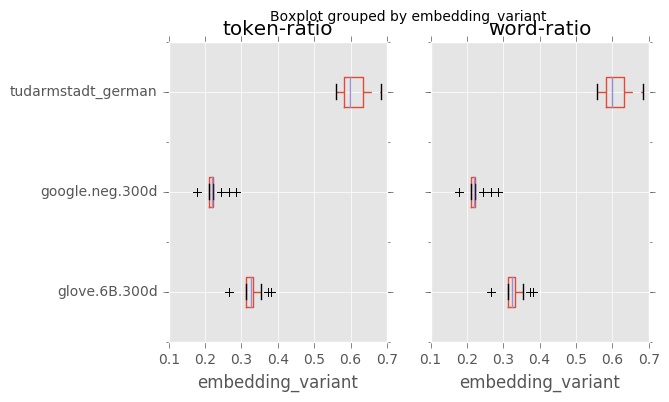

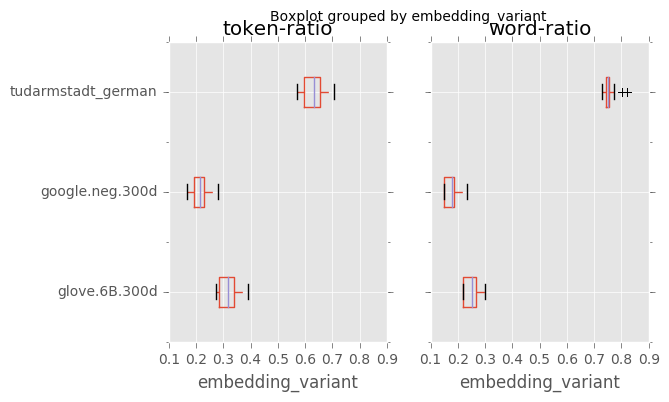

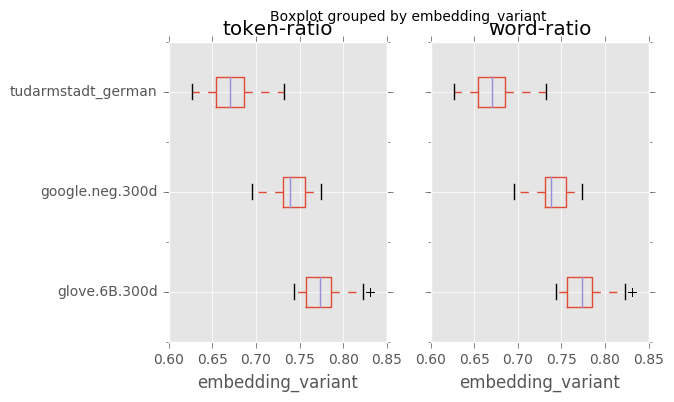

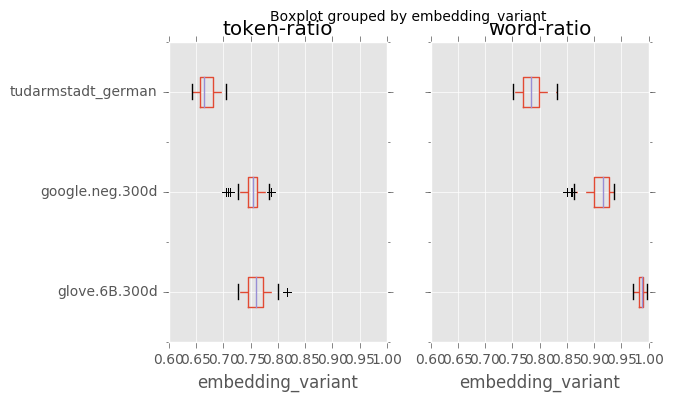

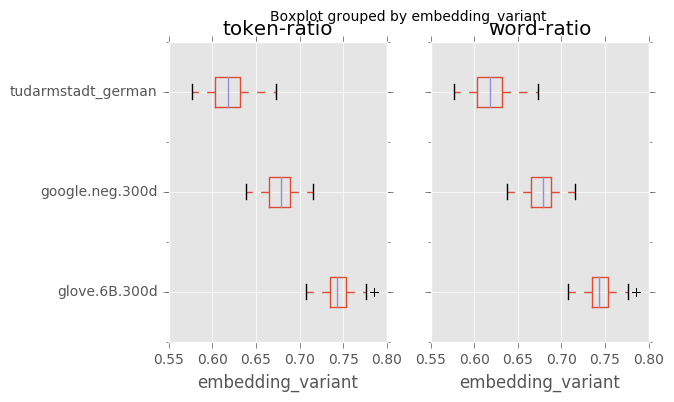

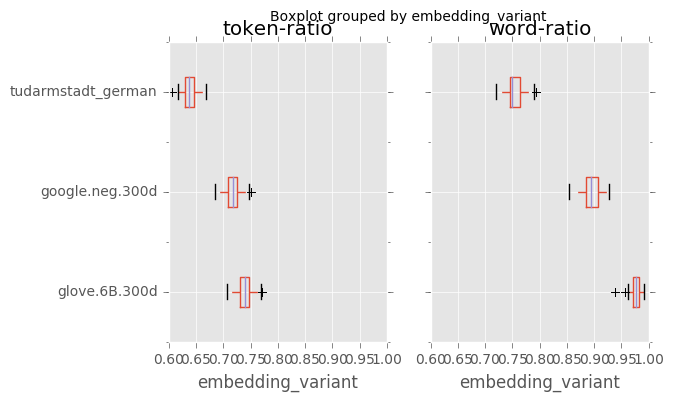

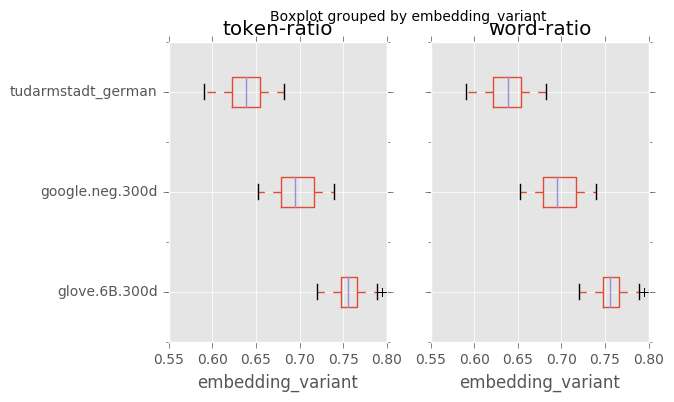

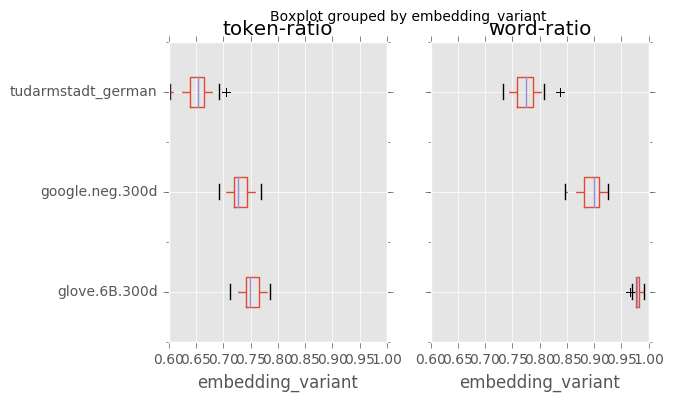

In [46]:
selected_col=COL_TOKEN_RATO
scol2 = COL_WORD_RATIO
for (n, g) in t:
#    pd.plot_params.use(legend=False)
    plt.figure()
    g.boxplot(column=[selected_col, scol2], by=COL_EMVAR, vert=False)
    filename = "C:\\users\\hatieke\\.ukpsummarizer\\tmp\\embeddings-quality--ratio-%s-%s-%s.pdf" % (n[0], n[1], selected_col)
    plt.savefig(filename)
    plt.show()

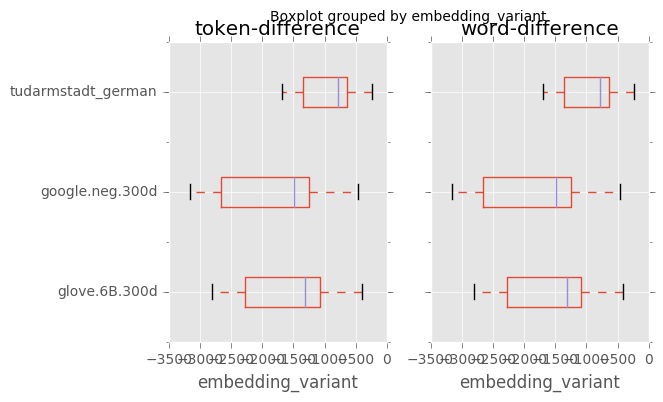

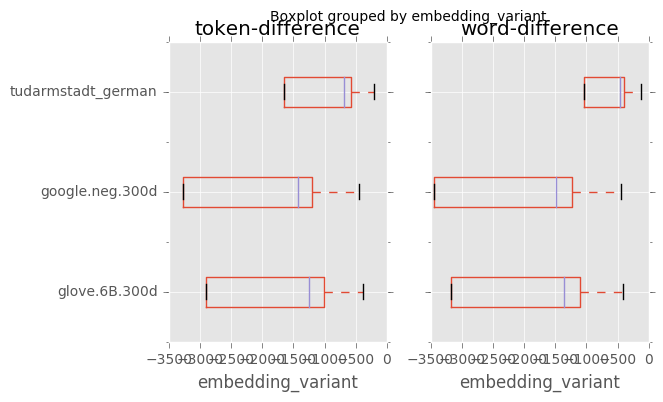

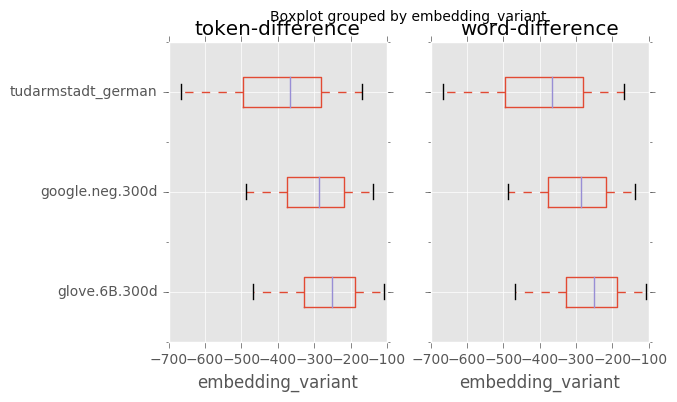

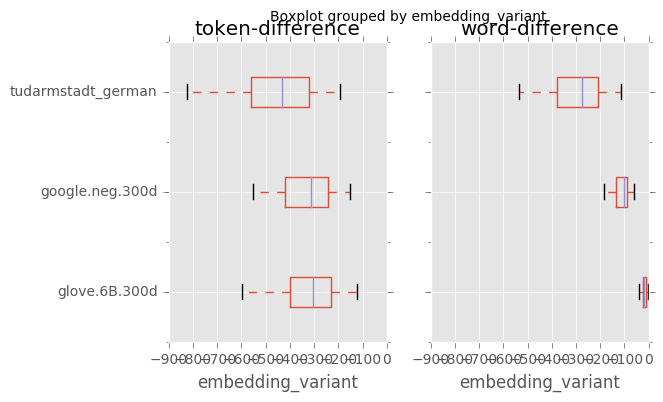

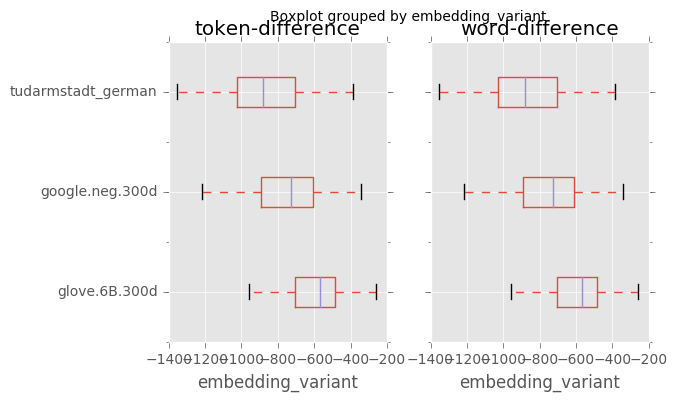

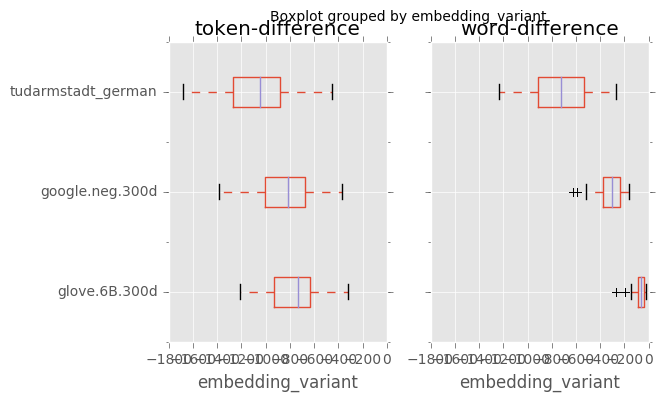

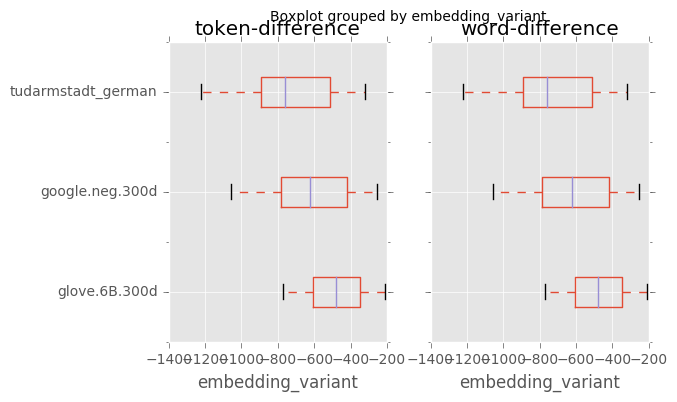

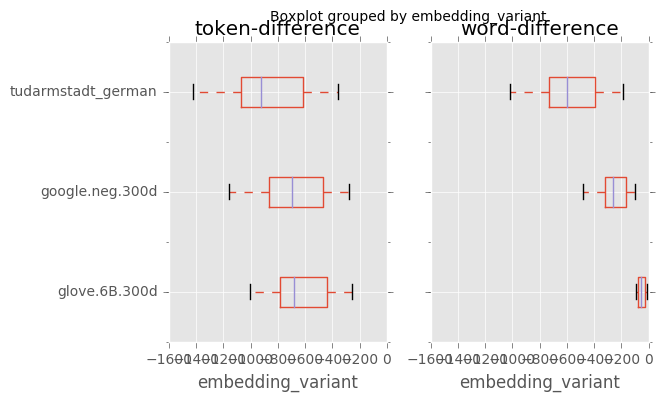

In [47]:
selected_col=COL_TOKEN_DIFF
scol2 = COL_WORD_DIFF
for (n, g) in t:
#    pd.plot_params.use(legend=False)
    plt.figure()
    g.boxplot(column=[selected_col, scol2, ], by=COL_EMVAR, vert=False)
    filename = "C:\\users\\hatieke\\.ukpsummarizer\\tmp\\embeddings-quality--diff--%s-%s-%s.pdf" % (n[0], n[1], selected_col)
    plt.savefig(filename)
    plt.show()

In [48]:
print t.size()


dataset  concept_type2
DBS      ngram             50094
         phrase            48276
DUC2004  ngram            157200
         phrase           178128
DUC2006  ngram            325182
         phrase           417909
DUC2007  ngram            243924
         phrase           302430
dtype: int64


In [ ]:
#plotly.boxplot(column=[COL_TOKEN_SIZE], by="dataset")
##plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_size.png")
#plt.show()
#plotly.boxplot(column=[COL_TOKEN_DIFF], by="dataset")
##plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_diff.png")
#plt.show()
#plotly.boxplot(column=[COL_TOKEN_RATO], by="dataset")
##plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_ratio.png")
#plt.show()

In [ ]:
#plotly.boxplot(column=[COL_WORD_SIZE, COL_TOKEN_SIZE], by="dataset")
#plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_size.pdf")
##plt.show()
#plotly.boxplot(column=[COL_WORD_DIFF, COL_TOKEN_DIFF], by="dataset")
#plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_diff.pdf")
##plt.show()
#plotly.boxplot(column=[COL_WORD_RATIO, COL_TOKEN_RATO], by="dataset")
#plt.savefig("C:\\users\\hatieke\\.ukpsummarizer\\tmp\\ngram-token_embed_ratio.pdf")
##plt.show()

# plotly.plot.scatter(x=COL_TOKEN_COUNT, y=COL_WORD_COUNT)
plt.show()